In [2]:

import sys
import importlib
from collections import defaultdict
# sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

fname = 'ascending_axon_locs_plot_210412'

'''Load data'''
import compress_pickle
db_file = 'ascending_axon_locs_210412.gz'
data = compress_pickle.load(db_file)
soma_locs, synapse_locs = data

mpd = MyPlotData()

for grc in soma_locs:
    soma_loc = soma_locs[grc]
    synapse_loc = synapse_locs[grc]
    x_delta = synapse_loc[0] - soma_loc[0]
    if abs(x_delta/1000) > 200:
        print(f'{grc} has x displacement of {x_delta}')
    y = synapse_loc[1]
    y = 390-(y/1000)
    if y < 0:
        print(f'{grc} has ypos of {y}')
    # if y < 40:
    #     print(f'{grc} has ypos of {y}')
    if y > 180:
        print(f'{grc} has ypos of {y}')

    mpd.add_data_point(
        x_delta=x_delta/1000,
        y=y
        )


grc_1782 has ypos of 208.896
grc_1491 has ypos of 227.12
grc_756 has ypos of 188.4
grc_672 has ypos of 185.968
grc_869 has ypos of 211.664
grc_837 has ypos of 186.56
grc_347 has ypos of 187.68
grc_635 has ypos of 190.96
grc_416 has ypos of 198.336
grc_461 has ypos of 189.936
grc_1875 has ypos of 188.704
grc_983 has ypos of 225.264
grc_321 has ypos of 210.448
grc_1834 has ypos of 182.016
grc_438 has ypos of 187.856
grc_1125 has ypos of 225.344
grc_1096 has ypos of 198.272
grc_1249 has ypos of 183.392
grc_605 has ypos of 187.808


Height: 6, Aspect: 1.33


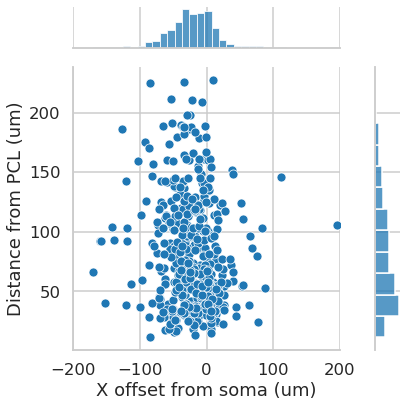

Height: 4, Aspect: 1.33


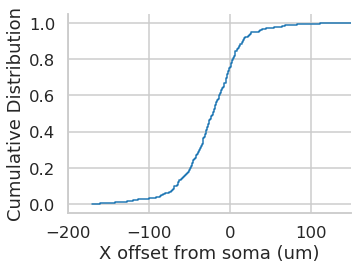

Height: 4, Aspect: 1.33


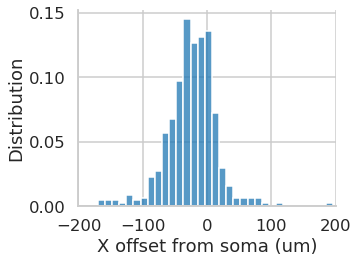

In [3]:

importlib.reload(my_plot); my_plot.my_jointplot(
    mpd,
    x="x_delta",
    y="y",
    y_axis_label='Distance from PCL (um)',
    x_axis_label='X offset from soma (um)',
    xlim=[-200, 200],
    # kind=f'{kind}',
    kind='scatter',
    save_filename=f'{fname}_joint.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x_delta",
    # y="y",
    y_axis_label='Cumulative Distribution',
    x_axis_label='X offset from soma (um)',
    xlim=[-200, 150],
    # kind=f'{kind}',
    kind='ecdf',
    # width=4,
    height=4,
    # save_filename=save_filename,
    save_filename=f'{fname}_cdf.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x_delta",
    # y="y",
    y_axis_label='Distribution',
    x_axis_label='X offset from soma (um)',
    xlim=[-200, 200],
    # kind=f'{kind}',
    kind='hist',
    stat='probability',
    # width=4,
    height=4,
    # save_filename=save_filename,
    save_filename=f'{fname}_bar.svg',
    show=True,
    )
